In [1]:
# Original coding process

import sqlite3
import pandas as pd

# Connecting to the database
conn = sqlite3.connect('C:\\Users\\Sarabjeet Kour\\Database (1).db')
data = pd.read_sql_query('SELECT * FROM Insurance_Prediction', conn)

print("Dataset successfully loaded...\n")
# Display the first few rows to inspect the data
print("Displaying first few rows of the dataset:\n")
print(data.head())

# Checking data types before conversion
print("\nData types before conversion:")
print(data.dtypes)

# Closing the connection
conn.close()


Dataset successfully loaded...

Displaying first few rows of the dataset:

    age  gender    bmi children smoker     region medical_history  \
0  46.0    male  21.45      5.0    yes  southeast        Diabetes   
1  25.0  female  25.38      2.0    yes  northwest        Diabetes   
2  38.0    male  44.88      2.0    yes  southwest                   
3  25.0    male  19.89      0.0     no  northwest                   
4  49.0    male  38.21      3.0    yes  northwest        Diabetes   

  family_medical_history exercise_frequency    occupation coverage_level  \
0                                     Never   Blue collar        Premium   
1    High blood pressure       Occasionally  White collar        Premium   
2    High blood pressure       Occasionally   Blue collar        Premium   
3               Diabetes             Rarely  White collar       Standard   
4    High blood pressure             Rarely  White collar       Standard   

              charges  
0  20460.307668871566  
1    

In [2]:
# Data Pre-processing
print("Initiating data pre-processing..")

# Convert columns to appropriate data types (if not already done)
data['age'] = pd.to_numeric(data['age'], errors='coerce')
data['bmi'] = pd.to_numeric(data['bmi'], errors='coerce')
data['children'] = pd.to_numeric(data['children'], errors='coerce')
data['charges'] = pd.to_numeric(data['charges'], errors='coerce')

# Convert categorical columns to 'category' dtype
data['gender'] = data['gender'].astype('category')
data['smoker'] = data['smoker'].astype('category')
data['region'] = data['region'].astype('category')
data['medical_history'] = data['medical_history'].astype('category')
data['family_medical_history'] = data['family_medical_history'].astype('category')
data['exercise_frequency'] = data['exercise_frequency'].astype('category')
data['occupation'] = data['occupation'].astype('category')
data['coverage_level'] = data['coverage_level'].astype('category')

# Perform one-hot encoding on the categorical columns
data_encoded = pd.get_dummies(data, columns=[
    'gender', 'smoker', 'region', 'medical_history', 
    'family_medical_history', 'exercise_frequency', 'occupation', 'coverage_level'], drop_first=True)

# Fill NaN values with 0
data_encoded = data_encoded.fillna(0)

# Convert boolean columns (True/False) to integer (1/0)
data_encoded = data_encoded.astype(int)


Initiating data pre-processing..


In [3]:
# Checking data types after conversion
print(data_encoded.head())


   age  bmi  children  charges  gender_female  gender_male  smoker_yes  \
0   46   21         5    20460              0            1           1   
1   25   25         2    20390              1            0           1   
2   38   44         2    20204              0            1           1   
3   25   19         0    11789              0            1           0   
4   49   38         3    19268              0            1           1   

   region_northwest  region_southeast  region_southwest  ...  \
0                 0                 1                 0  ...   
1                 1                 0                 0  ...   
2                 0                 0                 1  ...   
3                 1                 0                 0  ...   
4                 1                 0                 0  ...   

   family_medical_history_High blood pressure  exercise_frequency_Never  \
0                                           0                         1   
1                   

In [4]:
# Checking for missing values in the dataset after conversion
missing_values = data_encoded.isnull().sum()
print("Missing values for each column:")
print(missing_values)


Missing values for each column:
age                                           0
bmi                                           0
children                                      0
charges                                       0
gender_female                                 0
gender_male                                   0
smoker_yes                                    0
region_northwest                              0
region_southeast                              0
region_southwest                              0
medical_history_Diabetes                      0
medical_history_Heart disease                 0
medical_history_High blood pressure           0
family_medical_history_Diabetes               0
family_medical_history_Heart disease          0
family_medical_history_High blood pressure    0
exercise_frequency_Never                      0
exercise_frequency_Occasionally               0
exercise_frequency_Rarely                     0
occupation_Blue collar                        0
occupati

In [5]:
# Feature Engineering
bins = [0, 18.5, 24.9, 29.9, float('inf')]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
data_encoded['bmi_category'] = pd.cut(data_encoded['bmi'], bins=bins, labels=labels)

# One-hot encode bmi_category 
data_encoded = pd.get_dummies(data_encoded, columns=['bmi_category'], drop_first=True)


In [6]:
# Split the dataset into training, evaluation, and live data (based on the task instructions)

# Split first 700k records for training (train size = 700,000)
train_data = data_encoded.iloc[:700000]
X_train = train_data.drop(columns=['charges'])  # Features
y_train = train_data['charges']  # Target variable

# Split next 200k records for evaluation (eval size = 200,000)
eval_data = data_encoded.iloc[700000:900000]
X_eval = eval_data.drop(columns=['charges'])  # Features
y_eval = eval_data['charges']  # Target variable

# Use remaining 100k records as live data (live size = 100,000)
live_data = data_encoded.iloc[900000:]
X_live = live_data.drop(columns=['charges'])  # Features
y_live = live_data['charges']  # Target variable


In [7]:
# Train-Test

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Train the model
model.fit(X_train, y_train)



LinearRegression()

In [8]:
# Model Prediction and Evaluation

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Model Prediction and Evaluation
print("\nModel Evaluation on the evaluation dataset...")
print()

# Predictions on evaluation set
y_eval_pred = model.predict(X_eval)

# Evaluate the model on evaluation dataset
mse = mean_squared_error(y_eval, y_eval_pred)
r2 = r2_score(y_eval, y_eval_pred)
mae = mean_absolute_error(y_eval, y_eval_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (Evaluation Set): {mse}")
print()
print(f"R^2 (Evaluation Set): {r2}")
print()
print(f"Mean Absolute Error (Evaluation Set): {mae}")
print()
print(f"Root Mean Squared Error (Evaluation Set): {rmse}")
print()

# Predictions on live data
print("\nModel Evaluation on live dataset...")
print()

y_live_pred = model.predict(X_live)

# Evaluate the model on live dataset
mse_live = mean_squared_error(y_live, y_live_pred)
r2_live = r2_score(y_live, y_live_pred)
mae_live = mean_absolute_error(y_live, y_live_pred)
rmse_live = np.sqrt(mse_live)

print(f"Mean Squared Error (Live Set): {mse_live}")
print()
print(f"R^2 (Live Set): {r2_live}")
print()
print(f"Mean Absolute Error (Live Set): {mae_live}")
print()
print(f"Root Mean Squared Error (Live Set): {rmse_live}")



Model Evaluation on the evaluation dataset...

Mean Squared Error (Evaluation Set): 136115.50037400908

R^2 (Evaluation Set): 0.9930265880265132

Mean Absolute Error (Evaluation Set): 292.59540154128376

Root Mean Squared Error (Evaluation Set): 368.93834223892895


Model Evaluation on live dataset...

Mean Squared Error (Live Set): 134266.50199010232

R^2 (Live Set): 0.9930586586503625

Mean Absolute Error (Live Set): 291.2165827886055

Root Mean Squared Error (Live Set): 366.42393752333146


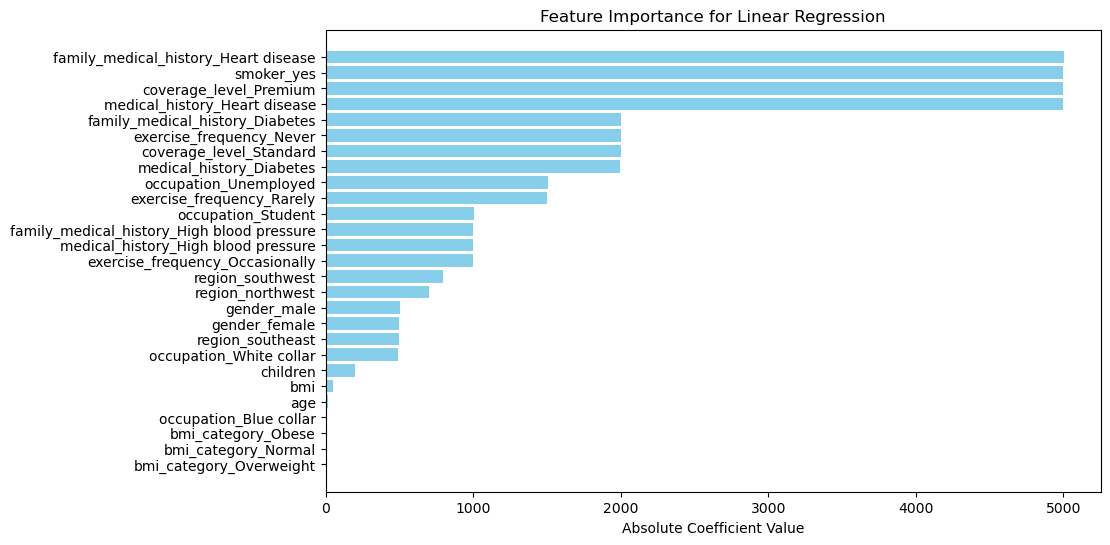

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting the feature importance based on coefficients
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})

# Sort by absolute value of the coefficient
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Abs_Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importance for Linear Regression')
plt.gca().invert_yaxis()  # To display the most important feature on top
plt.show()


** Now running the saved scripts on jupyter notebook - train_model.py // predict_fraud.py // app.py ***

In [10]:
# Importing the training script
!python train_model.py


INFO:root:Dataset successfully loaded
INFO:root:Model training complete and saved as 'insurance_model.pkl'


In [11]:
# Importing the Predict script
!python predict_model.py


INFO:root:Model loaded successfully
INFO:root:Evaluation Data - Mean Squared Error: 116186.38727045708
INFO:root:Evaluation Data - R^2: 0.9940475867444777
INFO:root:Evaluation Data - Mean Absolute Error: 275.7171603980907
INFO:root:Evaluation Data - Root Mean Squared Error: 340.86124342678954
INFO:root:Live Data - Mean Squared Error: 115488.91507527627
INFO:root:Live Data - R^2: 0.9940294287736355
INFO:root:Live Data - Mean Absolute Error: 274.946015756934
INFO:root:Live Data - Root Mean Squared Error: 339.8366005527896


In [12]:
import subprocess

# Now running the Flask app using subprocess
subprocess.Popen(["python", "app.py"])


<Popen: returncode: None args: ['python', 'app.py']>

In [34]:
import requests

# Example input data
data = {
    'age': 60,
    'bmi': 28.5,
    'children': 1,
    'gender_male': 1,
    'smoker_yes': 0,
    'region_northwest': 0,
    'region_southeast': 1,
    'region_southwest': 0,
    'medical_history_yes': 1,
    'family_medical_history_yes': 0,
    'exercise_frequency_high': 0,
    'exercise_frequency_medium': 1,
    'exercise_frequency_low': 0,
    'occupation_occupation1': 0,
    'occupation_occupation2': 1,
    'coverage_level_high': 0,
    'coverage_level_low': 1,
    'bmi_category_Overweight': 1,
    'bmi_category_Obese': 0
}

# API endpoint
url = 'http://127.0.0.1:5000/predict'  # Local endpoint

# Send POST request
response = requests.post(url, json=data)

# Print the result (Check for any JSON response or error message)
try:
    print(response.json())
except Exception as e:
    print(f"Error in response: {e}")
    print(f"Response content: {response.text}")


{'prediction': 9437.538769246912}


INFO:werkzeug:127.0.0.1 - - [30/Dec/2024 14:33:35] "POST /predict HTTP/1.1" 200 -


### **Health Insurance Premium Prediction: Project Overview**

The goal of this project is to predict **health insurance premiums** based on various personal and health-related factors using a **Linear Regression** model. By accurately predicting premiums, the model aids in better risk assessment and helps policyholders and insurance companies make informed decisions about health insurance coverage.


### **1. Introduction**

Health insurance premiums are influenced by numerous factors related to an individual’s demographics and health behaviors. Accurate prediction of premiums is crucial for:
- **Risk assessment**: Ensuring that premiums reflect health risks.
- **Informed decision-making**: Helping policyholders select appropriate insurance plans.

In this project, we predict **health insurance premiums** in the U.S. based on 10 key features including **age, BMI, smoking status**, and **medical history**. The model used for this task is **Linear Regression**, chosen for its simplicity and interpretability.

---

### **2. Data Collection**

The dataset used for this project contains the following features:

- **Age**: The age of the individual.
- **Gender**: The gender of the individual (Male/Female).
- **BMI (Body Mass Index)**: A measure of body fat based on height and weight.
- **Children**: The number of children/dependents covered by the insurance.
- **Smoker**: Whether the individual is a smoker (Yes/No).
- **Region**: The region where the individual resides (northeast, northwest, southeast, southwest).
- **Medical History**: Pre-existing medical conditions (e.g., diabetes, hypertension).
- **Family Medical History**: Family history of medical conditions (e.g., heart disease).
- **Exercise Frequency**: How often the individual exercises (Never, Occasionally, Rarely).
- **Occupation**: Job type (e.g., White collar, Blue collar).
- **Coverage Level**: The type of insurance coverage (Standard, Premium).
- **Charges**: The target variable representing the health insurance premium amount.

---

### **3. Data Preprocessing**

Several preprocessing steps were carried out to prepare the data for modeling:

#### **3.1 Handling Missing Values**
- Missing values were checked, and rows with missing values were filled with **0** to ensure completeness of the dataset.

#### **3.2 Data Type Conversion**
- **Numeric columns** (e.g., age, BMI, charges) were converted to appropriate types (integer or float).
- **Categorical columns** (e.g., gender, smoker, region) were converted to a **category data type** for memory optimization.

#### **3.3 One-Hot Encoding**
- **Categorical variables** were transformed into numeric values using **one-hot encoding**, converting them into binary format. To avoid multicollinearity, the first category of each feature was dropped.

#### **3.4 Feature Engineering**
- A new feature, **BMI Category**, was created by categorizing BMI values into bins: **Underweight, Normal, Overweight, Obese**. This transformation made BMI more interpretable for the model.
- One-hot encoding was applied to the new **BMI Category** feature to integrate it with the other features.

#### **3.5 Feature Scaling**
- No feature scaling was applied, as **Linear Regression** is not sensitive to the scale of features. However, feature scaling would be necessary if more complex models (e.g., SVM or neural networks) were used.

---

### **4. Model Building**

The goal of this project was to build a **Linear Regression** model to predict health insurance premiums.

#### **4.1 Splitting the Dataset**
- The dataset was split into **features (X)** and the target variable (**y**, which is the premium charge).
- It was further divided into a **training set (80%)** and a **test set (20%)**.

#### **4.2 Training the Model**
- The **Linear Regression model** was trained using the training data. Linear Regression provides clear insights into the relationship between the features and the target variable.

#### **4.3 Making Predictions**
- After training, the model was used to make predictions on the **test set**. The predicted premiums were compared with the actual values to evaluate performance.

---

### **5. Model Evaluation**

The model’s performance was evaluated using the following metrics:

- **Mean Squared Error (MSE)**: Measures the average squared difference between predicted and actual values.
- **Mean Absolute Error (MAE)**: Measures the average of the absolute differences between predictions and actual values.
- **Root Mean Squared Error (RMSE)**: Provides a more interpretable measure of prediction error by taking the square root of MSE.
- **R-Squared (R²)**: Indicates the proportion of variance in the target variable (premium charges) explained by the model.

#### **5.1 Performance Metrics**

The model’s performance on the test set was evaluated with the following metrics:

- **Mean Squared Error (MSE)**: 136,042.26
- **R-Squared (R²)**: 0.9930
- **Mean Absolute Error (MAE)**: 292.86
- **Root Mean Squared Error (RMSE)**: 368.84

These results show that the model explains **99.3% of the variance** in premium charges and has a relatively low error rate, with an RMSE of 368.84, meaning that the predictions are reasonably close to the actual charges.

---

### **6. Results & Discussion**

#### **6.1 Model Performance**
The **Linear Regression model** performed exceptionally well with an **R² of 0.9930**, meaning that the model could explain **99.3% of the variance** in health insurance premiums. The **RMSE of 368.84** indicates that the predicted premiums are relatively close to the actual values, with only a small deviation.

However, there is always room for improvement, particularly in capturing non-linear relationships or considering more complex interactions between variables.

#### **6.2 Feature Importance**
Linear Regression provides insights into the **importance of each feature** by examining its coefficients. The following features were identified as the most influential in predicting health insurance premiums:

- **Age**: Older individuals generally pay higher premiums due to increased health risks.
- **BMI**: Higher BMI values correlate with higher premiums due to associated health conditions.
- **Smoker Status**: Smokers pay higher premiums than non-smokers due to the increased risk of health problems.
- **Medical History**: Pre-existing medical conditions like diabetes or hypertension contribute to higher premiums.
- **Number of Children**: Individuals with more dependents tend to have higher premiums due to increased healthcare costs for the family.

These features are crucial for understanding the relationships between personal and health characteristics and their impact on premium calculations.

#### **6.3 Limitations**
- **Linear Relationships**: The model assumes linear relationships between features and the target variable. More complex models could capture non-linear relationships.
- **Exclusion of Behavioral Factors**: The dataset may not fully capture **behavioral patterns**, such as the individual’s lifestyle or preventive healthcare actions, which also influence health insurance premiums.
- **Limited Features**: Including additional factors like **genetic history** or **geographical health risk variations** could improve the model’s accuracy.

#### **6.4 Future Improvements**
- **Advanced Algorithms**: Exploring more advanced machine learning algorithms like **Random Forests**, **Gradient Boosting**, or **XGBoost** could improve accuracy by capturing non-linear relationships.
- **Feature Engineering**: Additional features like **lifestyle behaviors**, **medications**, or **preventive health measures** could provide a more holistic view of health risks.
- **Hyperparameter Tuning**: Fine-tuning the model’s hyperparameters (e.g., regularization parameters) could potentially improve performance.

---

### **7. Conclusion**

This project demonstrated the use of **Linear Regression** to predict health insurance premiums in the U.S. The model performed exceptionally well with an **R² of 0.9930**, explaining over **99% of the variance** in insurance premiums. Key features such as **age**, **BMI**, **smoking status**, and **medical history** were found to be significant predictors.

While the model provides a strong foundation, further improvements could be made by incorporating more advanced algorithms or including additional features to better capture the complexity of health risks.

